In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set seaborn style for better visuals
sns.set_style('whitegrid')

In [3]:
# Load the Excel file
excel_file_path = '/content/Online Retail.xlsx'  # Replace with the actual path to your Excel file
df_excel = pd.read_excel(excel_file_path)

# Convert to CSV and save the file
csv_file_path = 'your_dataset.csv'  # Specify the path where you want to save the CSV file
df_excel.to_csv(csv_file_path, index=False)

print(f"Excel file successfully converted to {csv_file_path}")


Excel file successfully converted to your_dataset.csv


In [6]:
# Load the dataset from a CSV file
file_path = '/content/your_dataset.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)

In [7]:
# Load the dataset from the CSV file
df = pd.read_csv(csv_file_path)

In [8]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [9]:
# Check for basic info like column names and data types
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [10]:
# Check for missing values
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [55]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


**CLEAN THE DATASET**

**Q1. Data Cleaning and Preparation
 Q1.1: Clean the dataset by handling missing values, removing duplicates, and filtering
any irrelevant data (e.g., negative quantities).**

In [11]:
# Step 1: Remove columns that are not needed for the analysis (Description, CustomerID)
df_cleaned = df.drop(columns=['Description', 'CustomerID'])

# Step 2: Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Step 3: Remove rows with negative quantities (since negative quantities usually represent returns or errors)
df_cleaned = df_cleaned[df_cleaned['Quantity'] > 0]

# Step 4: Ensure 'InvoiceDate' is in datetime format
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Step 5: Remove rows with negative or zero UnitPrice (if applicable)
df_cleaned = df_cleaned[df_cleaned['UnitPrice'] > 0]

# Step 6: Fill missing values in 'Quantity' if needed (Optional)
# If there are missing values in 'Quantity', you can fill them with an appropriate value like 0.
# df_cleaned['Quantity'] = df_cleaned['Quantity'].fillna(0)

# Print basic information after cleaning
print("\nDataset Info after cleaning:")
print(df_cleaned.info())

# Check for missing values again
print("\nMissing values after cleaning:")
print(df_cleaned.isnull().sum())

# Display a few rows after cleaning
print("\nFirst few rows after cleaning:")
print(df_cleaned.head())



Dataset Info after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 524876 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524876 non-null  object        
 1   StockCode    524876 non-null  object        
 2   Quantity     524876 non-null  int64         
 3   InvoiceDate  524876 non-null  datetime64[ns]
 4   UnitPrice    524876 non-null  float64       
 5   Country      524876 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 28.0+ MB
None

Missing values after cleaning:
InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

First few rows after cleaning:
  InvoiceNo StockCode  Quantity         InvoiceDate  UnitPrice         Country
0    536365    85123A         6 2010-12-01 08:26:00       2.55  United Kingdom
1    536365     71053         6 2010-12-0


 Q1.2: Summarize the dataset by providing descriptive statistics (e.g., mean, median,
standard deviation) for relevant columns like Quantity, UnitPrice, and
InvoiceDate.

In [12]:
# Descriptive statistics for Quantity and UnitPrice
summary_stats = df_cleaned[['Quantity', 'UnitPrice']].describe()

# Additional statistics like median
median_quantity = df_cleaned['Quantity'].median()
median_unitprice = df_cleaned['UnitPrice'].median()

# Converting InvoiceDate to just the date (if necessary)
df_cleaned['InvoiceDateOnly'] = df_cleaned['InvoiceDate'].dt.date

# Summary of InvoiceDate to get range of dates (min and max)
invoice_date_stats = df_cleaned['InvoiceDateOnly'].agg(['min', 'max'])

# Display results
print("Summary Statistics for Quantity and UnitPrice:")
print(summary_stats)

print("\nMedian of Quantity:", median_quantity)
print("Median of UnitPrice:", median_unitprice)

print("\nInvoice Date Range:")
print(invoice_date_stats)


Summary Statistics for Quantity and UnitPrice:
            Quantity      UnitPrice
count  524876.000000  524876.000000
mean       10.616064       3.922575
std       156.279818      36.093096
min         1.000000       0.001000
25%         1.000000       1.250000
50%         4.000000       2.080000
75%        11.000000       4.130000
max     80995.000000   13541.330000

Median of Quantity: 4.0
Median of UnitPrice: 2.08

Invoice Date Range:
min    2010-12-01
max    2011-12-09
Name: InvoiceDateOnly, dtype: object


# `Summary and Inferences`
Quantity Sold:

Mean: 10.62 units

Median: 4.00 units

Standard Deviation: 156.28 units

Minimum: 1 unit

Maximum: 80,995 units

Inference: The average quantity sold per transaction is relatively low, but the large standard deviation suggests significant variability. The maximum quantity sold is exceptionally high, indicating some transactions involved bulk purchases.




 **Unit Price:**

Mean: $3.92

Median: $2.08

Standard Deviation: $36.09

Minimum: $0.001

Maximum: $13,541.33

Inference: The average unit price is much higher than the median, suggesting that while most items are priced below $2.08, there are a few extremely high-priced items that skew the average. The high standard deviation highlights the broad range of item prices.



 **Invoice Date Range:**

Start Date: December 1, 2010

End Date: December 9, 2011

Inference: The dataset covers a full year, with transactions spanning from the end of 2010 to the end of 2011. This period provides a comprehensive view of sales across a significant timeframe.



<ipython-input-21-cceea50acfcd>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=mean_values, palette='viridis')


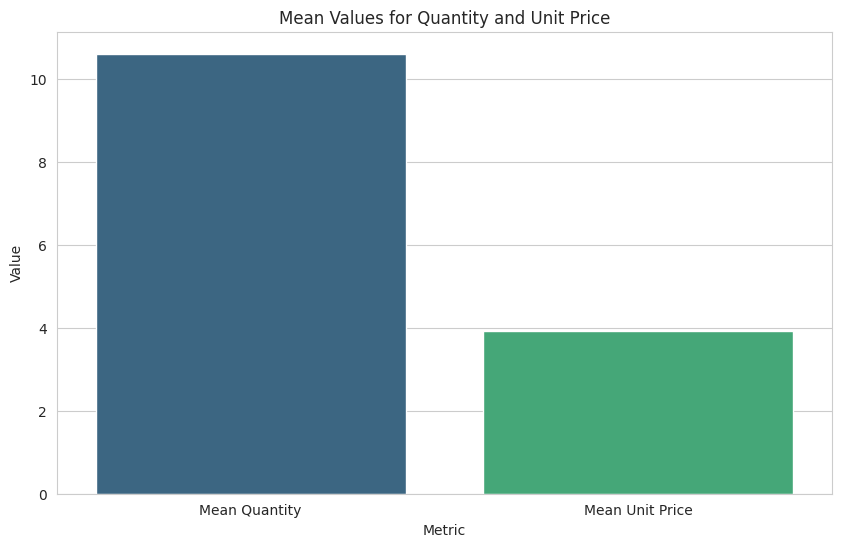

In [21]:
# Calculate mean values
mean_quantity = df_cleaned['Quantity'].mean()
mean_unit_price = df_cleaned['UnitPrice'].mean()

# Create a DataFrame for plotting
mean_values = pd.DataFrame({
    'Metric': ['Mean Quantity', 'Mean Unit Price'],
    'Value': [mean_quantity, mean_unit_price]
})

# Plotting the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=mean_values, palette='viridis')

# Customize plot
plt.title('Mean Values for Quantity and Unit Price')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

mean value for quatity in 10.62
aand mean value for unit price is 3.92$

<ipython-input-24-cb96a1b1faff>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=mode_values, palette='cividis')


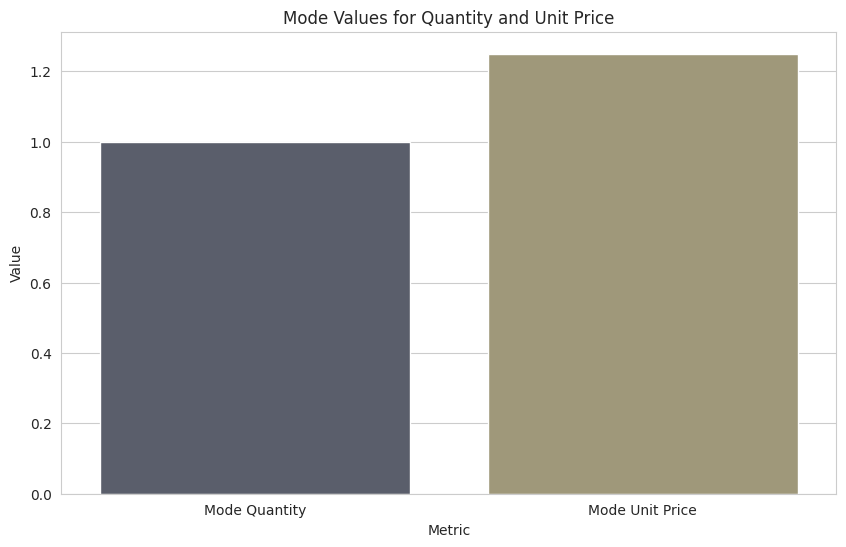

In [24]:
# Calculate mode values
mode_quantity = df_cleaned['Quantity'].mode().iloc[0]  # Mode can return multiple values; take the first one
mode_unit_price = df_cleaned['UnitPrice'].mode().iloc[0]  # Mode can return multiple values; take the first one

# Create a DataFrame for plotting
mode_values = pd.DataFrame({
    'Metric': ['Mode Quantity', 'Mode Unit Price'],
    'Value': [mode_quantity, mode_unit_price]
})

# Plotting the bar graph for mode values
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=mode_values, palette='cividis')

# Customize plot
plt.title('Mode Values for Quantity and Unit Price')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()


the value that most appear is 1 in quanity means minimum one quanity and
and in unit price it is 1.4,

<ipython-input-25-d7d569b8e365>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value', data=median_values, palette='magma')


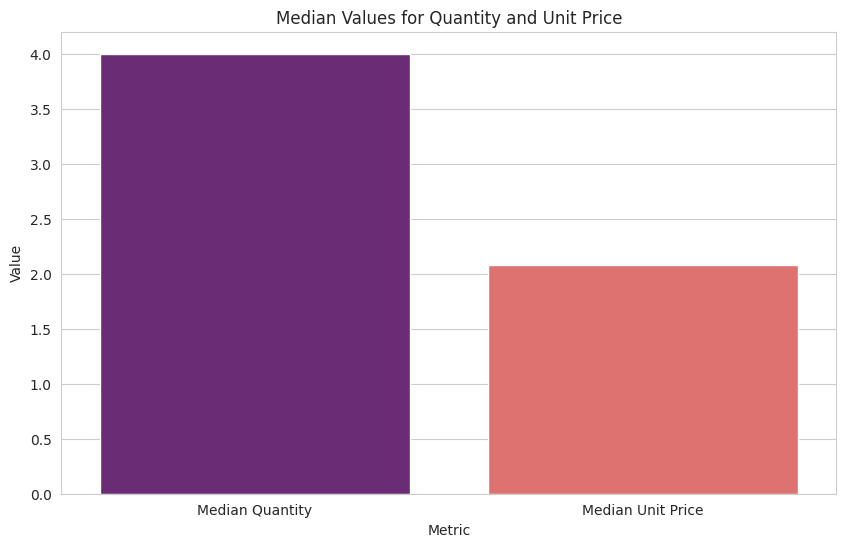

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate median values
median_quantity = df_cleaned['Quantity'].median()
median_unit_price = df_cleaned['UnitPrice'].median()

# Create a DataFrame for plotting
median_values = pd.DataFrame({
    'Metric': ['Median Quantity', 'Median Unit Price'],
    'Value': [median_quantity, median_unit_price]
})

# Plotting the bar graph for median values
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=median_values, palette='magma')

# Customize plot
plt.title('Median Values for Quantity and Unit Price')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()


median value is 4 for quanity
and for unit price is just above 2.2

In [32]:
# Calculate maximum and minimum quantity sold
max_quantity = df_cleaned['Quantity'].max()
min_quantity = df_cleaned['Quantity'].min()

# Print the results
print(f"Maximum Quantity Sold: {max_quantity}")
print(f"Minimum Quantity Sold: {min_quantity}")


Maximum Quantity Sold: 80995
Minimum Quantity Sold: 1


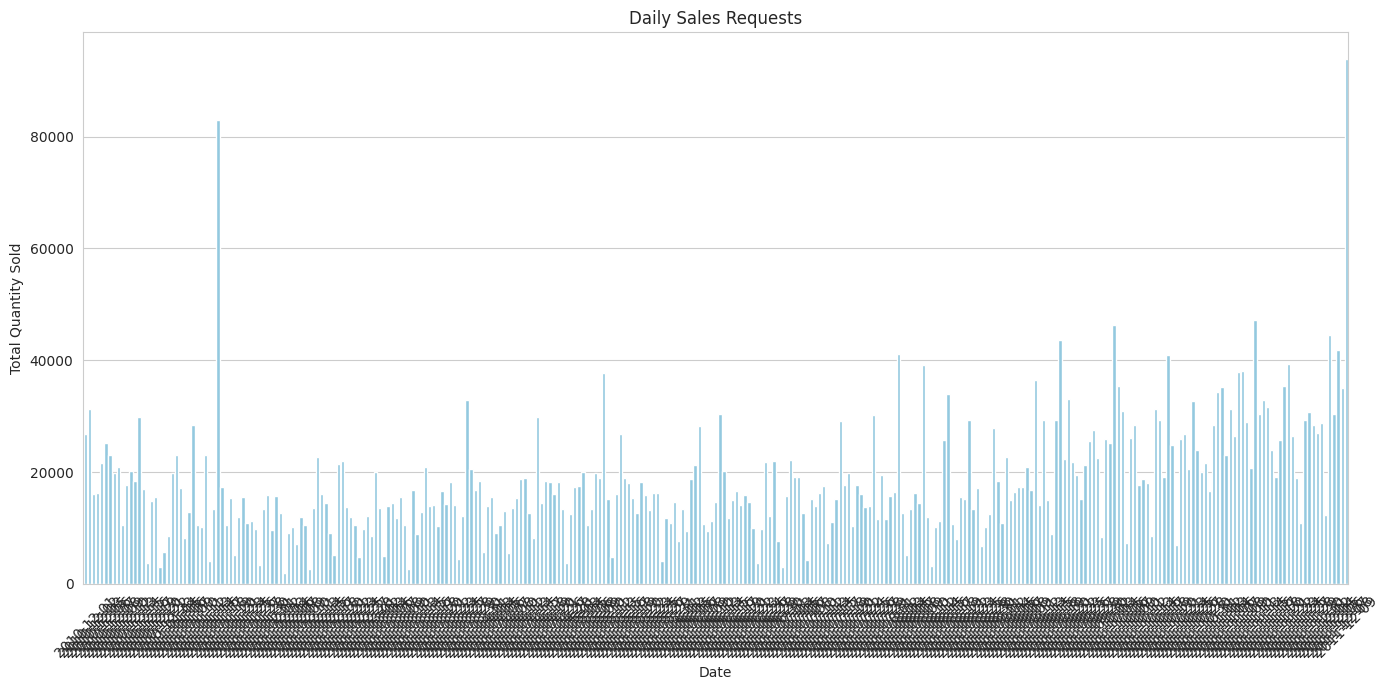

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data by day (or month)
daily_sales = df_cleaned.groupby(df_cleaned['InvoiceDate'].dt.date)['Quantity'].sum().reset_index()
daily_sales.columns = ['Date', 'Total_Quantity']

# Sort by date
daily_sales = daily_sales.sort_values('Date')

# Plotting the bar chart
plt.figure(figsize=(14, 7))
sns.barplot(x='Date', y='Total_Quantity', data=daily_sales, color='skyblue')

# Customize plot
plt.title('Daily Sales Requests')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Maximum Quantity Sold: 80995
Minimum Quantity Sold: 1

**Q2. Sales Analysis**

**Q2. Sales Analysis
 Q2.1: What are the top 10 best-selling products by quantity?**

In [33]:
import pandas as pd

# Assuming df_cleaned is your cleaned DataFrame
# Group by 'StockCode' and sum the 'Quantity'
product_quantity = df_cleaned.groupby('StockCode')['Quantity'].sum()

# Sort the products by total quantity in descending order
top_products_by_quantity = product_quantity.sort_values(ascending=False).head(10)

# Display the top 10 best-selling products by quantity
print("Top 10 Best-Selling Products by Quantity:")
print(top_products_by_quantity)


Top 10 Best-Selling Products by Quantity:
StockCode
23843     80995
23166     78033
22197     56898
84077     54951
85099B    48371
85123A    37641
21212     36396
84879     36362
23084     30739
22492     26633
Name: Quantity, dtype: int64


<ipython-input-34-c881c135d4b0>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Quantity', y='Product', data=top_products_df, palette='viridis')


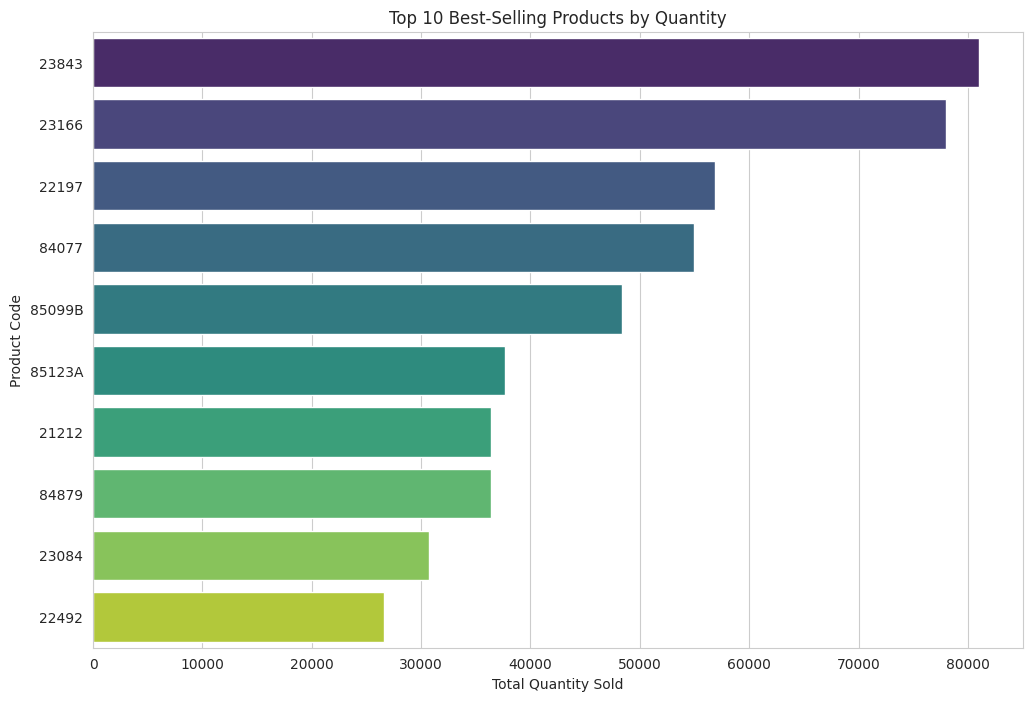

In [34]:
# Calculate total quantity sold per product
product_quantity = df_cleaned.groupby('StockCode')['Quantity'].sum()

# Sort and get top 10 products
top_products_by_quantity = product_quantity.sort_values(ascending=False).head(10)

# Create a DataFrame for plotting
top_products_df = top_products_by_quantity.reset_index()
top_products_df.columns = ['Product', 'Total Quantity']

# Plotting the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Quantity', y='Product', data=top_products_df, palette='viridis')

# Customize the plot
plt.title('Top 10 Best-Selling Products by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Code')
plt.show()

Top 10 Best-Selling Products by Quantity:
StockCode

23843     80995

23166     78033

22197     56898

84077     54951

85099B    48371

85123A    37641

21212     36396

84879     36362

23084     30739

22492     26633

as the number wise we can see the product with stock code 23843 has the heighest number of sold items around 80995 and rest of the items follows behind that

**Q2.2: What is the total revenue generated by each product? (Hint: Use Quantity *
UnitPrice to calculate total sales).**

In [35]:
# Calculate total revenue for each transaction
df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Group by 'StockCode' and sum the 'Revenue'
product_revenue = df_cleaned.groupby('StockCode')['Revenue'].sum()

# Sort the products by total revenue in descending order
top_revenue_products = product_revenue.sort_values(ascending=False)

# Display the total revenue generated by each product
print("Total Revenue Generated by Each Product:")
print(top_revenue_products)


Total Revenue Generated by Each Product:
StockCode
DOT       206248.770
22423     174156.540
23843     168469.600
85123A    104462.750
47566      99445.230
             ...    
90084          0.850
21268          0.840
51014c         0.830
84227          0.420
PADS           0.003
Name: Revenue, Length: 3922, dtype: float64


<ipython-input-36-342e318e5877>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Revenue', y='Product', data=top_revenue_df, palette='plasma')


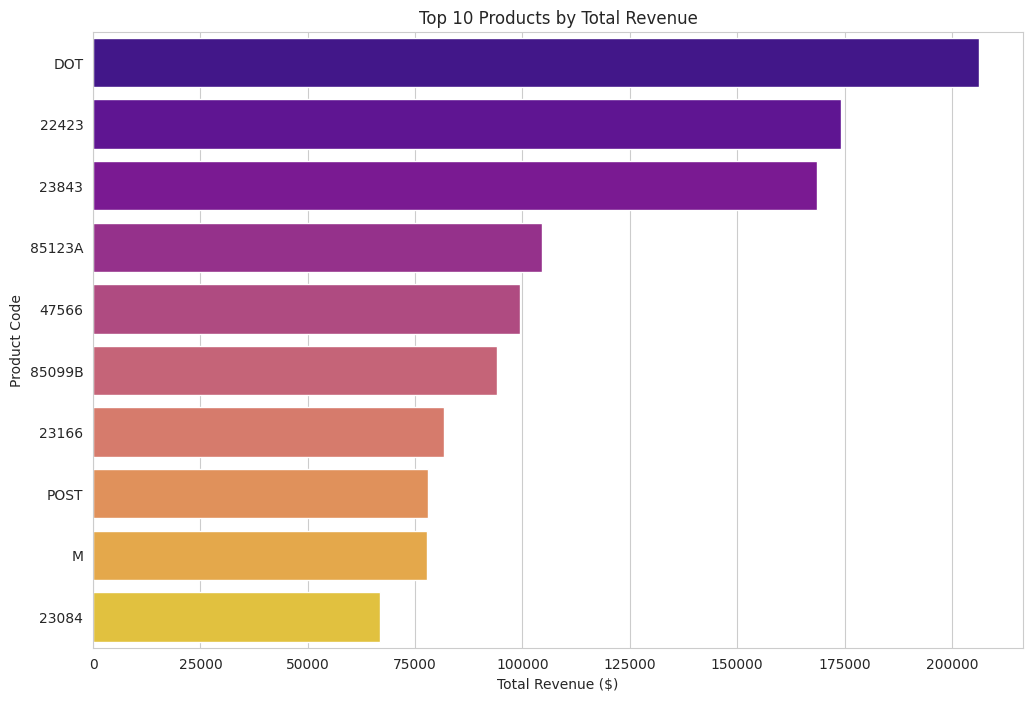

In [36]:
# Calculate total revenue for each product
df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Group by 'StockCode' and sum the 'Revenue'
product_revenue = df_cleaned.groupby('StockCode')['Revenue'].sum()

# Sort and get top 10 products by revenue
top_revenue_products = product_revenue.sort_values(ascending=False).head(10)

# Create a DataFrame for plotting
top_revenue_df = top_revenue_products.reset_index()
top_revenue_df.columns = ['Product', 'Total Revenue']

# Plotting the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Revenue', y='Product', data=top_revenue_df, palette='plasma')

# Customize the plot
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Product Code')
plt.show()


Total Revenue Generated by Each Product:
StockCode

DOT       206248.770

22423     174156.540

23843     168469.600

85123A    104462.750


47566      99445.230
             ...    

90084          0.850

21268          0.840

51014c         0.830

84227          0.420

PADS           0.003

the first item dot have given the most number of revenue followed by the other items

**Q2.3: What is the monthly revenue trend? Are there noticeable patterns or peaks in
sales over time?**

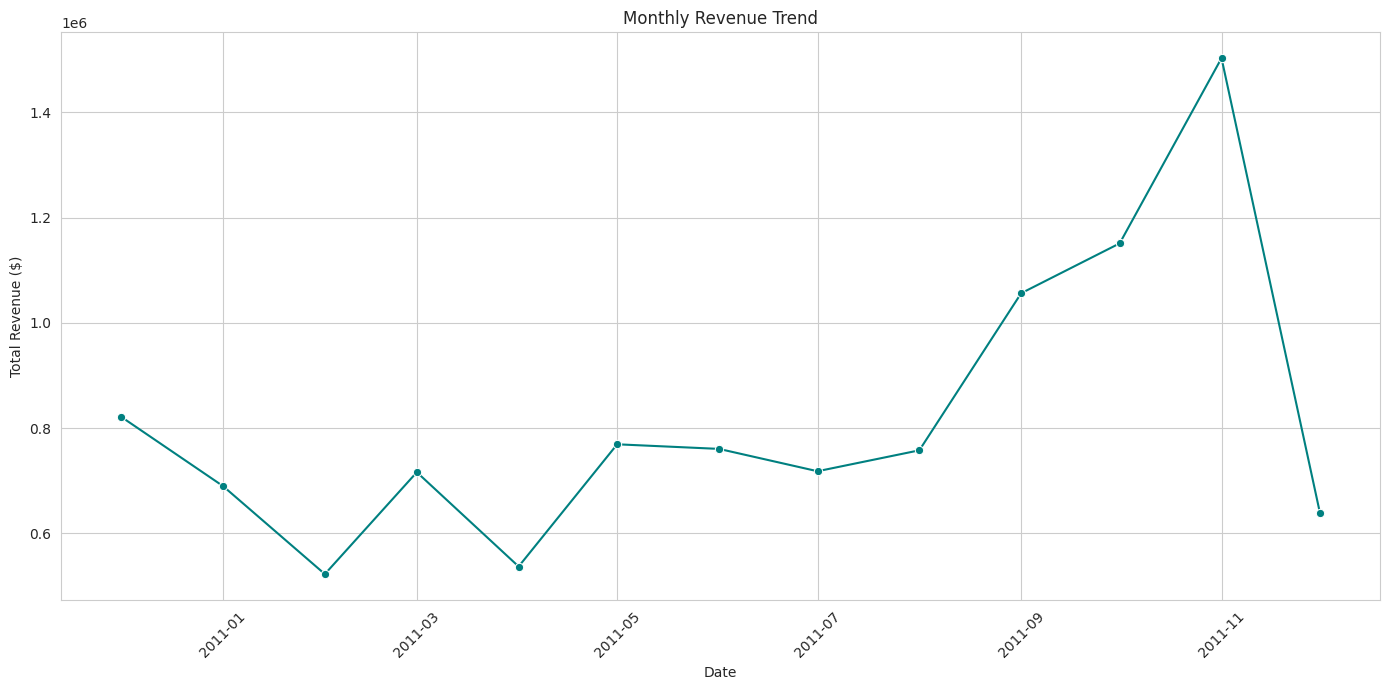

In [38]:
# Ensure 'InvoiceDate' is in datetime format
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Extract year and month from 'InvoiceDate'
df_cleaned['YearMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')

# Calculate total revenue for each transaction
df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Group by 'YearMonth' and sum the 'Revenue'
monthly_revenue = df_cleaned.groupby('YearMonth')['Revenue'].sum()

# Convert 'YearMonth' to a datetime object for plotting
monthly_revenue.index = monthly_revenue.index.to_timestamp()

# Plotting the monthly revenue trend
plt.figure(figsize=(14, 7))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o', color='teal')

# Customize the plot
plt.title('Monthly Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-39-1eba6247da65>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette='viridis')


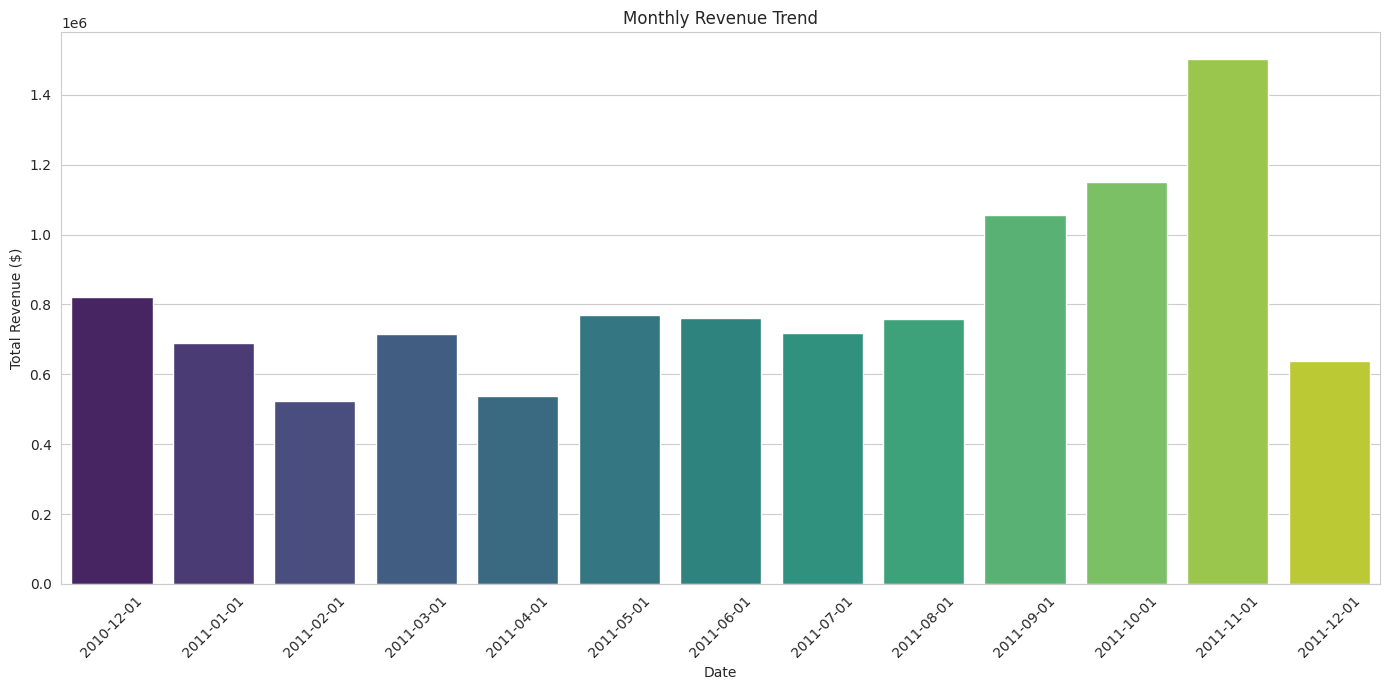

In [39]:
# Ensure 'InvoiceDate' is in datetime format
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Extract year and month from 'InvoiceDate'
df_cleaned['YearMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')

# Calculate total revenue for each transaction
df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Group by 'YearMonth' and sum the 'Revenue'
monthly_revenue = df_cleaned.groupby('YearMonth')['Revenue'].sum()

# Convert 'YearMonth' to a datetime object for plotting
monthly_revenue.index = monthly_revenue.index.to_timestamp()

# Plotting the monthly revenue trend as a bar chart
plt.figure(figsize=(14, 7))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette='viridis')

# Customize the plot
plt.title('Monthly Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

yes there is a significant peak towards the the end of the year especially from the septmeber to november and again from december it has came to the normal state.

****Q3. Customer Behaviour****

**Q3.1: How many unique customers are there in the dataset? What percentage of sales
is driven by repeat customers?**

In [42]:
import pandas as pd

# Count unique invoices
unique_invoices = df_cleaned['InvoiceNo'].nunique()

# Count total number of invoices
total_invoices = df_cleaned['InvoiceNo'].count()

# Count repeat invoices
repeat_invoices = df_cleaned['InvoiceNo'].value_counts()
repeat_invoices = repeat_invoices[repeat_invoices > 1].count()

# Calculate the percentage of repeat transactions
percentage_repeat_invoices = (repeat_invoices / total_invoices) * 100

# Print results
print(f"Number of unique invoices: {unique_invoices}")
print(f"Total number of invoices: {total_invoices}")
print(f"Number of repeat invoices: {repeat_invoices}")
print(f"Percentage of transactions from repeat invoices: {percentage_repeat_invoices:.2f}%")


Number of unique invoices: 19960
Total number of invoices: 524876
Number of repeat invoices: 18332
Percentage of transactions from repeat invoices: 3.49%



Number of Unique Invoices: 19,960

There are 19,960 distinct invoices in your dataset. Each invoice represents a unique transaction or order.

Total Number of Invoices: 524,876

There are a total of 524,876 invoices recorded in your dataset. This includes both unique and repeat invoices.
Number of Repeat Invoices: 18,332

Out of the total invoices, 18,332 invoices are repeats.

 This means these invoices have been issued more than once, indicating that these transactions are repeated.

Percentage of Transactions from Repeat Invoices: 3.49%

Only 3.49% of the total transactions come from these repeat invoices. This suggests that a relatively small portion of the transactions are repeated.

Summary:
Most transactions are unique (not repeated), with only a small percentage of transactions being repeated. This could imply that the majority of sales are from new or single transactions rather than repeat purchases.

**Q3.2: What is the average order value (total sales per invoice)? How does this vary
across different customer segments (e.g., country-wise)?**

In [44]:
# Calculate total sales per transaction
df_cleaned['TotalSales'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Group by InvoiceNo to get total sales per invoice
invoice_sales = df_cleaned.groupby('InvoiceNo')['TotalSales'].sum()

# Calculate the average order value
average_order_value = invoice_sales.mean()

print(f"Average Order Value: {average_order_value:.2f}")


Average Order Value: 533.14


In [45]:
# Group by Country and InvoiceNo to get total sales per invoice for each country
country_invoice_sales = df_cleaned.groupby(['Country', 'InvoiceNo'])['TotalSales'].sum().reset_index()

# Calculate average order value per country
average_order_value_country = country_invoice_sales.groupby('Country')['TotalSales'].mean().sort_values(ascending=False)

print("\nAverage Order Value by Country:")
print(average_order_value_country)



Average Order Value by Country:
Country
Singapore               3039.898571
Netherlands             3036.663191
Australia               2429.014211
Japan                   1969.282632
Lebanon                 1693.880000
Hong Kong               1407.545455
Brazil                  1143.600000
Sweden                  1065.773056
Switzerland             1056.807407
Denmark                 1053.074444
Israel                  1016.176250
Norway                  1004.595556
RSA                     1002.310000
EIRE                     983.126806
Greece                   952.104000
Cyprus                   843.928125
Channel Islands          786.174615
USA                      716.078000
Spain                    683.984000
United Arab Emirates     634.093333
Iceland                  615.714286
Canada                   611.063333
Austria                  599.922353
Portugal                 580.742241
Finland                  549.904390
Malta                    545.118000
France                 

<ipython-input-46-54c3ffbcc913>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_order_value_country.index, y=average_order_value_country.values, palette='viridis')


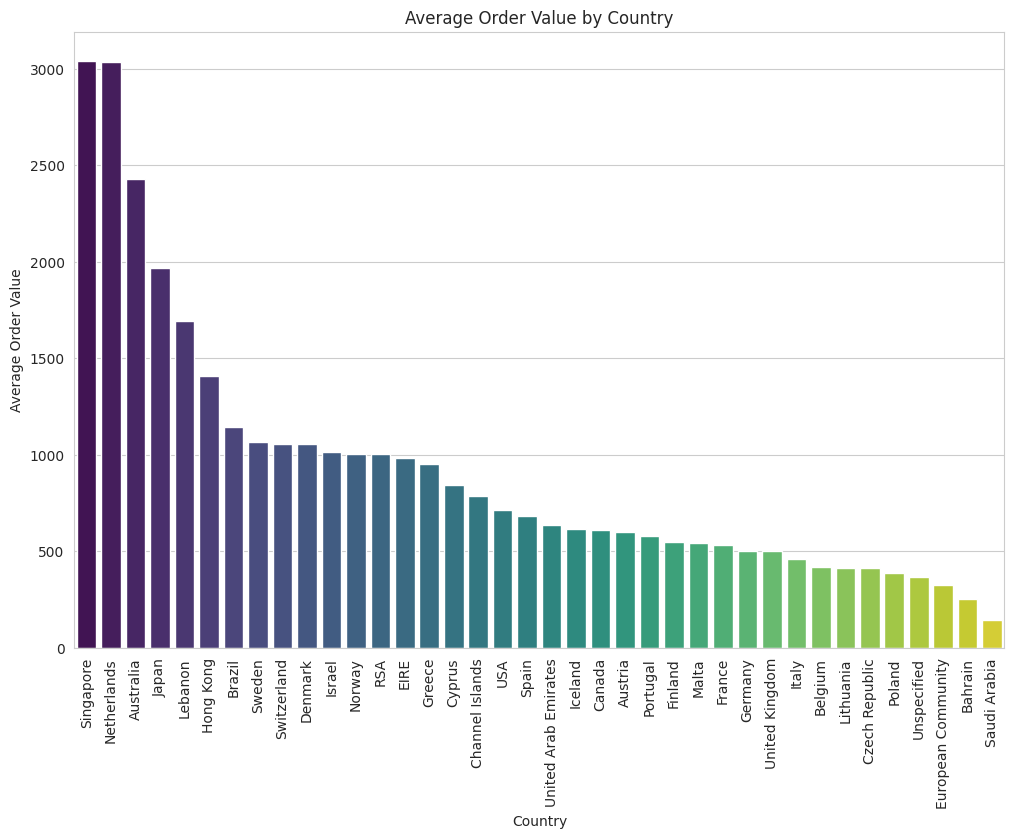

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting average order value by country
plt.figure(figsize=(12, 8))
sns.barplot(x=average_order_value_country.index, y=average_order_value_country.values, palette='viridis')

# Customize plot
plt.title('Average Order Value by Country')
plt.xlabel('Country')
plt.ylabel('Average Order Value')
plt.xticks(rotation=90)
plt.show()


this is the average value by each of the country
first is isngapore
then netherlands and so on


and the average order value is Average Order Value: 533.14

** Q3.3: Which countries contribute the most to sales revenue?**

<ipython-input-47-5cf935708341>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Revenue', y='Country', data=country_revenue_df, palette='magma')


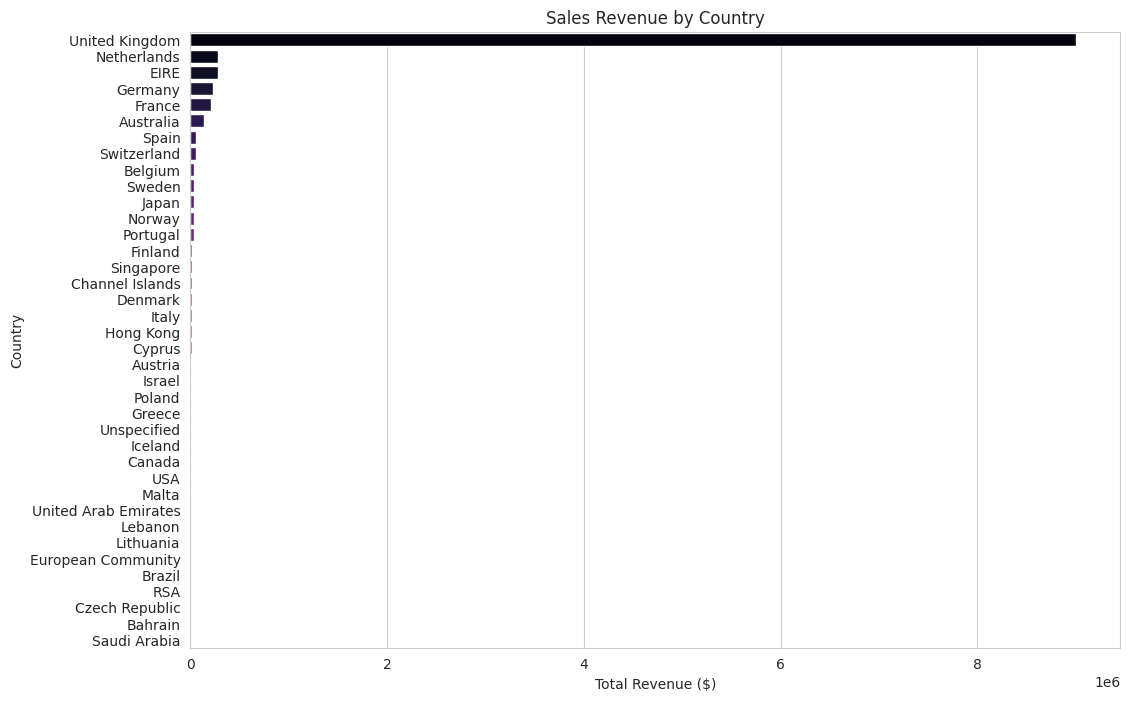

In [47]:
# Calculate total revenue for each transaction
df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Group by 'Country' and sum the 'Revenue'
country_revenue = df_cleaned.groupby('Country')['Revenue'].sum()

# Sort the countries by total revenue in descending order
country_revenue_sorted = country_revenue.sort_values(ascending=False)

# Create a DataFrame for plotting
country_revenue_df = country_revenue_sorted.reset_index()
country_revenue_df.columns = ['Country', 'Total Revenue']

# Plotting the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Revenue', y='Country', data=country_revenue_df, palette='magma')

# Customize the plot
plt.title('Sales Revenue by Country')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Country')
plt.show()

united kingdom has contributed most to the sales revenue, followed by netherland and eire, germany, france, australia, spain and so on.

**Q4. Product Performance**

** Q4.1: What are the top 5 countries with the highest average revenue per transaction?**

In [48]:
import pandas as pd

# Calculate total sales per transaction
df_cleaned['TotalSales'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']


In [49]:
# Group by Country and InvoiceNo to get total sales per invoice for each country
country_invoice_sales = df_cleaned.groupby(['Country', 'InvoiceNo'])['TotalSales'].sum().reset_index()


In [50]:
# Calculate average revenue per transaction by country
average_revenue_country = country_invoice_sales.groupby('Country')['TotalSales'].mean().sort_values(ascending=False)

# Get the top 5 countries
top_5_countries = average_revenue_country.head(5)

print("Top 5 Countries with Highest Average Revenue per Transaction:")
print(top_5_countries)


Top 5 Countries with Highest Average Revenue per Transaction:
Country
Singapore      3039.898571
Netherlands    3036.663191
Australia      2429.014211
Japan          1969.282632
Lebanon        1693.880000
Name: TotalSales, dtype: float64


<ipython-input-51-bf6a38c68a1c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_countries.index, y=top_5_countries.values, palette='viridis')


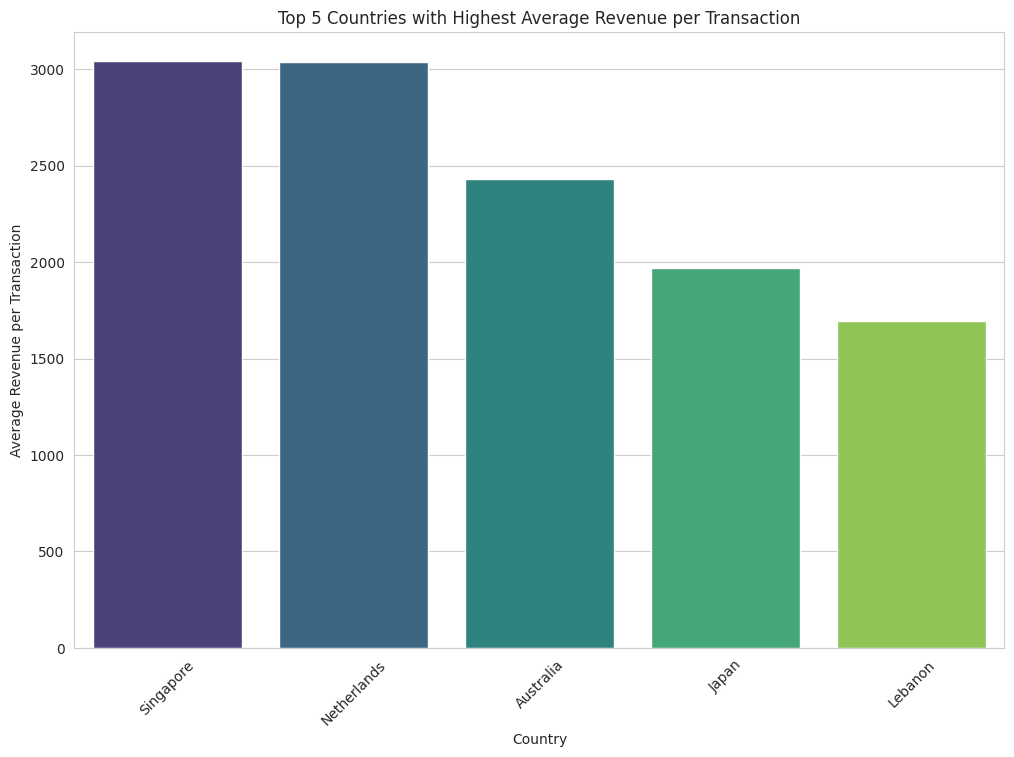

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the top 5 countries with the highest average revenue per transaction
plt.figure(figsize=(12, 8))
sns.barplot(x=top_5_countries.index, y=top_5_countries.values, palette='viridis')

# Customize plot
plt.title('Top 5 Countries with Highest Average Revenue per Transaction')
plt.xlabel('Country')
plt.ylabel('Average Revenue per Transaction')
plt.xticks(rotation=45)
plt.show()



Top 5 Countries with Highest Average Revenue per Transaction:

Country

Singapore      3039.898571

Netherlands    3036.663191

Australia      2429.014211

Japan          1969.282632

Lebanon        1693.880000


singapore followed by netherlands, australia, japan and lebanon


**Q4.2: Investigate if there are any specific months or seasons when certain products
perform particularly well.**

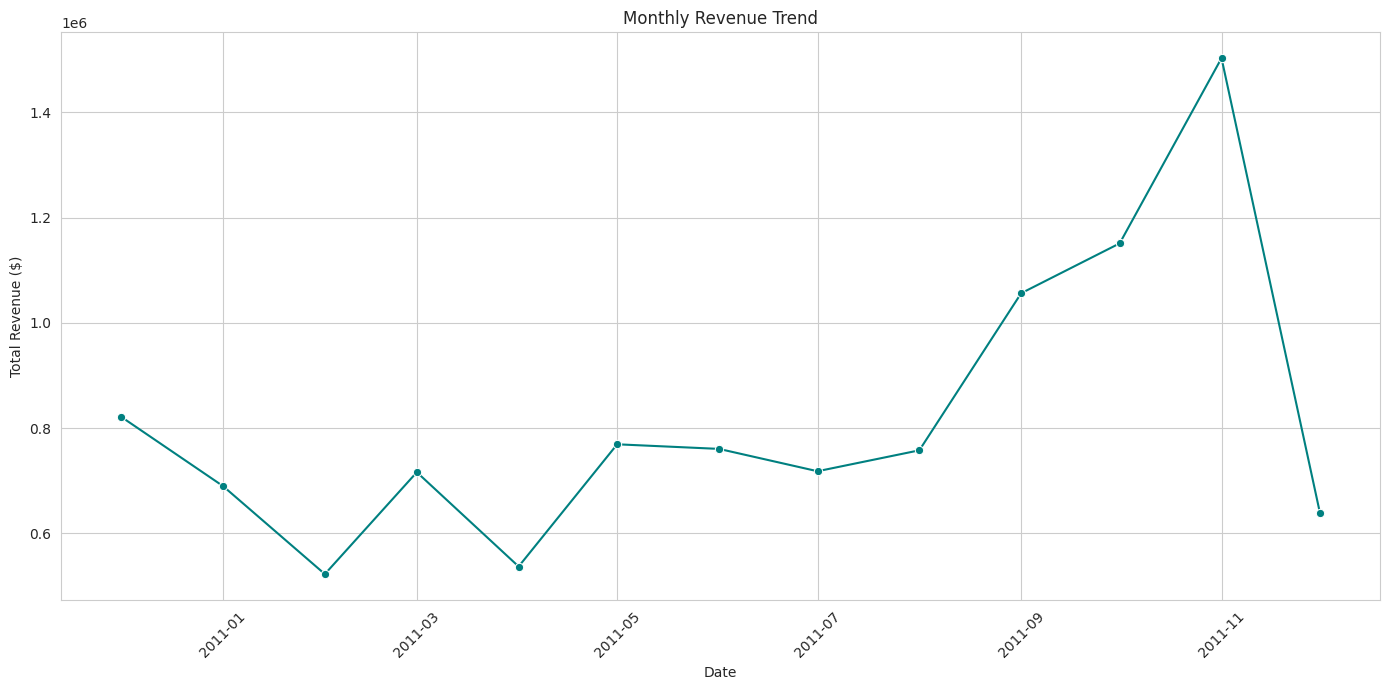

In [63]:
# Ensure 'InvoiceDate' is in datetime format
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Extract year and month from 'InvoiceDate'
df_cleaned['YearMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')

# Calculate total revenue for each transaction
df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Group by 'YearMonth' and sum the 'Revenue'
monthly_revenue = df_cleaned.groupby('YearMonth')['Revenue'].sum()

# Convert 'YearMonth' to a datetime object for plotting
monthly_revenue.index = monthly_revenue.index.to_timestamp()

# Plotting the monthly revenue trend
plt.figure(figsize=(14, 7))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o', color='teal')

# Customize the plot
plt.title('Monthly Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
# Find the month(s) with the peak revenue
peak_month = monthly_revenue.idxmax()
peak_revenue = monthly_revenue.max()

print(f"Peak Revenue Month: {peak_month}")
print(f"Peak Revenue Value: ${peak_revenue:.2f}")


Peak Revenue Month: 2011-11-01 00:00:00
Peak Revenue Value: $1503329.78


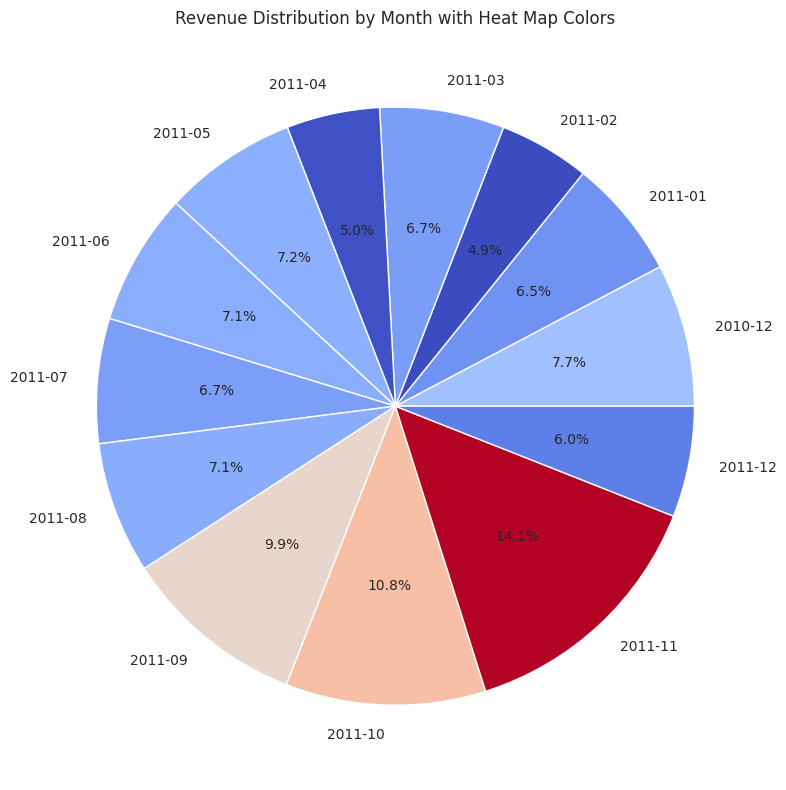

In [65]:

# Ensure 'InvoiceDate' is in datetime format
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Extract year and month from 'InvoiceDate'
df_cleaned['YearMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')

# Calculate total revenue for each transaction
df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Group by 'YearMonth' and sum the 'Revenue'
monthly_revenue = df_cleaned.groupby('YearMonth')['Revenue'].sum()

# Convert 'YearMonth' to a datetime object for plotting
monthly_revenue.index = monthly_revenue.index.to_timestamp()

# Create a colormap for heatmap effect
cmap = plt.get_cmap('coolwarm')  # You can choose any colormap

# Normalize revenue values for coloring
norm = plt.Normalize(monthly_revenue.min(), monthly_revenue.max())
colors = cmap(norm(monthly_revenue))

# Plotting a pie chart for revenue distribution by month with heat map colors
plt.figure(figsize=(10, 8))
plt.pie(monthly_revenue, labels=monthly_revenue.index.strftime('%Y-%m'), autopct='%1.1f%%', colors=colors)

# Customize the plot
plt.title('Revenue Distribution by Month with Heat Map Colors')
plt.tight_layout()
plt.show()

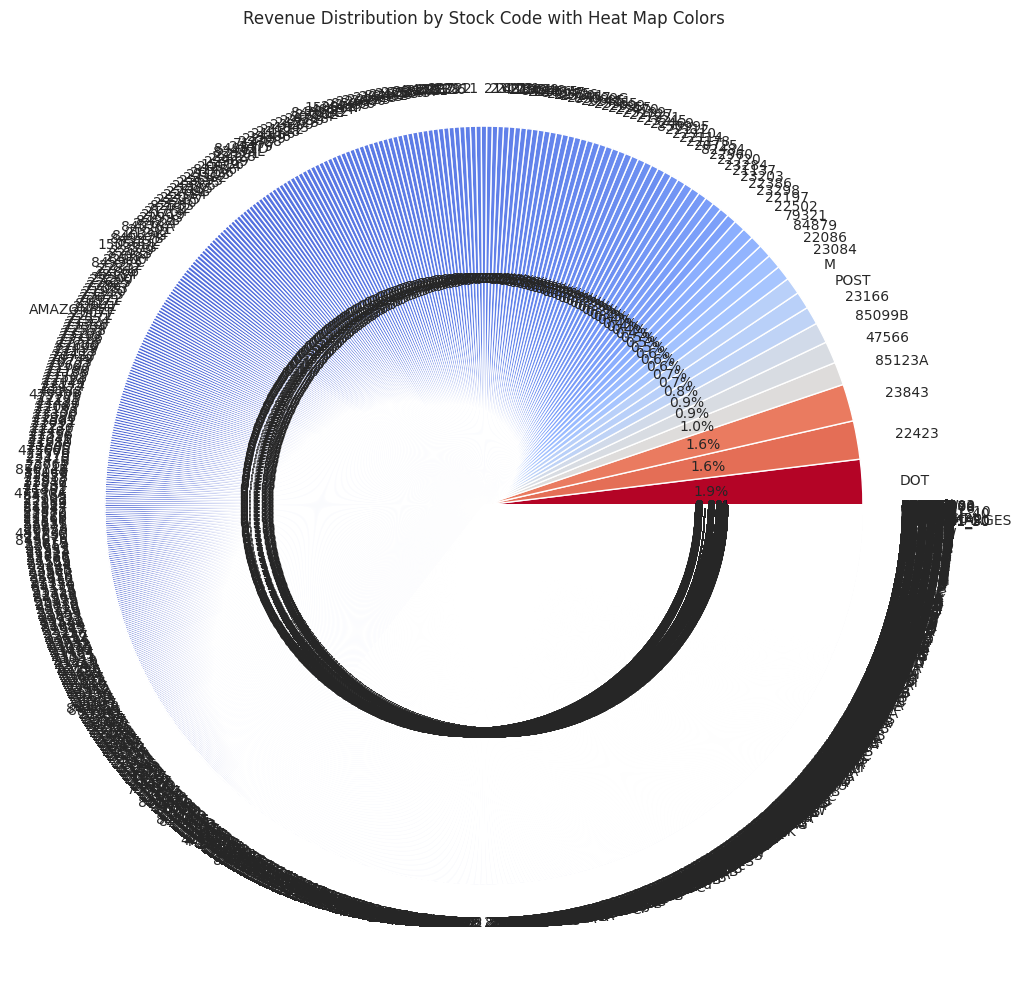

In [66]:

# Ensure 'InvoiceDate' is in datetime format
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Calculate total revenue for each transaction
df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Group by 'StockCode' and sum the 'Revenue'
revenue_by_stock = df_cleaned.groupby('StockCode')['Revenue'].sum().sort_values(ascending=False)

# Create a colormap for heatmap effect
cmap = plt.get_cmap('coolwarm')  # You can choose any colormap

# Normalize revenue values for coloring
norm = plt.Normalize(revenue_by_stock.min(), revenue_by_stock.max())
colors = cmap(norm(revenue_by_stock))

# Plotting a pie chart for revenue distribution by stock code with heat map colors
plt.figure(figsize=(12, 10))
plt.pie(revenue_by_stock, labels=revenue_by_stock.index, autopct='%1.1f%%', colors=colors)

# Customize the plot
plt.title('Revenue Distribution by Stock Code with Heat Map Colors')
plt.tight_layout()
plt.show()

In [69]:
import plotly.express as px

In [70]:
# Ensure 'InvoiceDate' is in datetime format
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Extract year and month from 'InvoiceDate'
df_cleaned['YearMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')

# Calculate total revenue for each transaction
df_cleaned['Revenue'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Find top products by total revenue
top_products = df_cleaned.groupby('StockCode')['Revenue'].sum().nlargest(10).index

# Filter dataset for top products
top_products_data = df_cleaned[df_cleaned['StockCode'].isin(top_products)]

# Group by 'YearMonth' and 'StockCode' to get total revenue
monthly_product_revenue = top_products_data.groupby(['YearMonth', 'StockCode'])['Revenue'].sum().reset_index()

# Convert 'YearMonth' to a datetime object for plotting
monthly_product_revenue['YearMonth'] = monthly_product_revenue['YearMonth'].astype(str)


In [71]:
# Create the heatmap using Plotly
fig = px.imshow(
    monthly_product_revenue.pivot_table(index='YearMonth', columns='StockCode', values='Revenue'),
    color_continuous_scale='Viridis',
    labels=dict(x="Product", y="Month", color="Revenue"),
    title='Monthly Revenue for Top Products'
)

# Show the interactive plot
fig.update_layout(xaxis_title='Product', yaxis_title='Month')
fig.show()


In [72]:
# Create line plot using Plotly
fig = px.line(
    monthly_product_revenue,
    x='YearMonth',
    y='Revenue',
    color='StockCode',
    title='Monthly Revenue Trends for Top Products',
    labels={'YearMonth': 'Month', 'Revenue': 'Revenue'},
    markers=True
)

# Show the interactive plot
fig.update_layout(xaxis_title='Month', yaxis_title='Revenue')
fig.show()


**Product Performance Insights:
Dominance of Product 10002: The product with StockCode 10002 stands out with remarkable performance spikes, notably in February, March, May, and October 2011. Its performance is consistently higher than that of other products throughout the year, indicating its status as a top-performing item.

Fluctuations in Performance: Most products exhibit generally low and stable performance across the months, with occasional fluctuations. For instance, StockCode 15034 shows noticeable spikes in June and October, suggesting some variability in its sales.

Seasonal Patterns: A discernible pattern emerges with a mid-year dip in performance for many products, followed by a significant boost in October and a subsequent decline towards the end of the year. This suggests potential seasonal trends where sales peak during specific periods.

Low-Performing Products: Several products, including StockCodes 10080, 10120, 10135, and 15036, display consistently low performance throughout the year. This suggests that these items contribute minimally to overall sales.**